In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# In 1 deck with 1 card combo Avg is 15 Staple+Handtrap 10 Starter 10 Extender 5 Brick
# Cal prop start hand 5 card have 0-1 brick 2 staple 1 starter 1-2 extender

In [2]:
def choose(n,r):
    return (np.math.factorial(n))/(np.math.factorial(r)*np.math.factorial(n-r)) #  n!/( r! * (n-r)! )

Example Firewall deck

In [3]:
Starter = 9
Extender = 9
Brick = 7
Staple = 5
Handtrap = 11
Deck = Starter + Extender + Brick + Staple + Handtrap
Deck

41

In [4]:
def DeckCal(Starter,Extender,Brick,Staple,Handtrap,WantStarter,WantExtender,WantBrick,Other):
    StaHT = Staple + Handtrap
    ns =  choose(Deck,5)
    ne = choose(Starter,WantStarter)*choose(Extender,WantExtender)*choose(Brick,WantBrick)*choose(StaHT,Other)

    prop = ne/ns
    return prop*100 

DeckCal(9,9,7,5,11 ,1,0,1,3)

4.707778777098418

In [5]:
def PlayAble(Starter,Extender,Brick,Staple,Handtrap,  WantStarter):
    Deck = Starter + Extender + Brick + Staple + Handtrap
    print("deck : " + str(Deck))
    ns =  choose(Deck,5)
    ne = choose(Starter,WantStarter)*choose(Deck-Starter,5 - WantStarter)

    prop = ne/ns
    return prop*100 

print(PlayAble(6,9,7,5,11 ,1)) #deck 39 starter 6

print(PlayAble(7,9,7,5,11 ,1)) #deck 40 starter 7

print(PlayAble(8,9,7,5,11 ,1)) #deck 41 starter 8

print(PlayAble(9,9,7,5,11 ,1)) #deck 42 starter 9

deck : 38
42.98504608102131
deck : 39
43.7198331935174
deck : 40
43.7198331935174
deck : 41
43.18666449603548


In [6]:
def PlayAble2(Starter,Deck):
    ns =  choose(Deck,5)
    ne = choose(Starter,1)*choose(Deck-Starter,4)

    prop = ne/ns
    return prop*100 

In [22]:
PlayAble2(3,41)

29.54971857410882

In [28]:
def DrawSide(Side,Deck):
    ns =  choose(Deck,5)
    ne = choose(Deck-Side,5)

    prop = 1-ne/ns
    return prop*100 

In [29]:
DrawSide(1,40)

33.75506072874494

In [8]:
data = []

In [9]:
for i in range(43,44):
    for j in range(2,4):
        d = "{:.3f}".format(PlayAble2(j,i))
        AD = (i,j,d)
        data.append(AD)

In [10]:
data
sorted_data = sorted(data, key=lambda x: x[2], reverse=True)

In [11]:
sorted_data

[(43, 3, '28.482'), (43, 2, '21.041')]

In [12]:
def HT12(HT,Deck):
    ns =  choose(Deck,5)
    ne = choose(HT,1)*choose(Deck-HT,4) + choose(HT,2)*choose(Deck-HT,3)
    prop = ne/ns
    return prop*100 

In [13]:
HT12(9,43)

65.73959222853154

In [14]:
dataHT = []
for i in range(40,43):
    for j in range(14,15):
        d = "{:.3f}".format(HT12(j,i))
        AD = (i,j,d)
        dataHT.append(AD)
sorted_dataHT = sorted(dataHT, key=lambda x: x[2], reverse=True)
sorted_dataHT


[(42, 14, '68.742'), (41, 14, '68.305'), (40, 14, '67.765')]

In [15]:
dataX = []
for i in range(40,42):
    for j in range(4,10):
        d = "{:.3f}".format(PlayAble2(j,i))
        AD = (i,j,d)
        dataX.append(AD)
sorted_dataX = sorted(dataX, key=lambda x: x[2], reverse=True)
sorted_dataX

[(40, 8, '43.720'),
 (41, 8, '43.683'),
 (40, 7, '43.531'),
 (41, 7, '43.319'),
 (41, 9, '43.187'),
 (40, 9, '43.037'),
 (40, 6, '42.288'),
 (41, 6, '41.922'),
 (40, 5, '39.787'),
 (41, 5, '39.302'),
 (40, 4, '35.808'),
 (41, 4, '35.252')]

# Best ratio in Firewall  
Starter 8  
Extender 9  
Handtrap 10  
Staple 5  
Brick 8    

# Calculate Process
1. Find number fix play card in deck then classified  
2. Find range of all type card
3. Find deck size range
4. Calculate & config

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


deck : 35
deck : 36
deck : 37
deck : 38
deck : 39
deck : 40
deck : 41
deck : 42
deck : 43
deck : 44
deck : 45
deck : 46


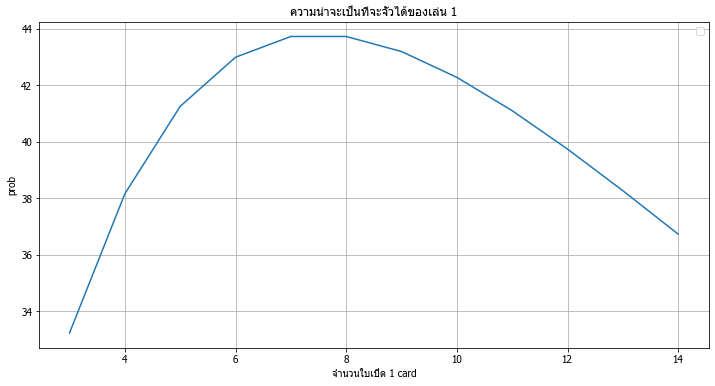

In [16]:
plt.figure(figsize=[12,6])
plt.plot(range(3,15),[PlayAble(x,9,7,5,11 ,1) for x in range(3,15)]) #8 starter -> deck 40
plt.legend()
plt.title('ความน่าจะเป็นที่จะจั่วได้ของเล่น 1')
plt.xlabel('จำนวนใบเปิด 1 card')
plt.ylabel('prob')
plt.grid()
plt.show()

# Case 2 card combo Cal prop start hand 5 card that can be play able
condition  
have 2 combo piece  


example Drytron deck  
deck 40  
alpha 3  
zeta 3    
findpair any2 diff name  


In [17]:
ComboP1 = 3 #alpha
ComboP1 = 3 #zeta
ComboAny = 9 #drytron nova3 cyber emer 3 diviner 3
Deck = 40

In [18]:
def AlphaZeta(p1,p2,Deck):
    ns =  choose(Deck,5)
    ne = choose(3,1)*choose(3,1)*choose(Deck-2,3)
    prop = ne/ns
    return prop*100 
AlphaZeta(3,3,40)

11.538461538461538

In [19]:
def TwoCard(Input,Deck): #Input = number combo play card in deck
    ns =  choose(Deck,5)
    ne = choose(Deck-Input,5) +  choose(Input,1)*choose(Deck-Input,4)#dont draw + draw only 1 
    prop = 1-ne/ns #draw 2 piece combo at least 1
    return prop*100 
TwoCard(25,42)

92.27806852967315

In [20]:
dataTwo = []
for i in range(40,45):
    for j in range(9,21):
        d = "{:.3f}".format(TwoCard(j,i))
        AD = (i,j,d)
        dataTwo.append(AD)
sorted_dataTwo = sorted(dataTwo, key=lambda x: x[2], reverse=True)
sorted_dataTwo

[(40, 20, '82.918'),
 (41, 20, '81.312'),
 (42, 20, '79.706'),
 (40, 19, '79.626'),
 (43, 20, '78.106'),
 (41, 19, '77.940'),
 (44, 20, '76.517'),
 (42, 19, '76.266'),
 (40, 18, '75.988'),
 (43, 19, '74.611'),
 (41, 18, '74.241'),
 (44, 19, '72.976'),
 (42, 18, '72.519'),
 (40, 17, '72.009'),
 (43, 18, '70.826'),
 (41, 17, '70.223'),
 (44, 18, '69.164'),
 (42, 17, '68.474'),
 (40, 16, '67.703'),
 (43, 17, '66.764'),
 (41, 16, '65.902'),
 (44, 17, '65.094'),
 (42, 16, '64.148'),
 (40, 15, '63.089'),
 (43, 16, '62.442'),
 (41, 15, '61.298'),
 (44, 16, '60.785'),
 (42, 15, '59.564'),
 (40, 14, '58.195'),
 (43, 15, '57.884'),
 (41, 14, '56.441'),
 (44, 15, '56.260'),
 (42, 14, '54.750'),
 (43, 14, '53.120'),
 (40, 13, '53.058'),
 (44, 14, '51.550'),
 (41, 13, '51.367'),
 (42, 13, '49.743'),
 (43, 13, '48.185'),
 (40, 12, '47.724'),
 (44, 13, '46.690'),
 (41, 12, '46.121'),
 (42, 12, '44.589'),
 (43, 12, '43.124'),
 (40, 11, '42.248'),
 (44, 12, '41.723'),
 (41, 11, '40.758'),
 (42, 11, '39